# Microsoft Movie Studio Business Project

**Authors:** Marcelo Scatena
***
## Overview

Microsfot is creating a movie studio and wants business recommendations for it. The Box Office Movies Gross database can give us information on which movies have done better worldwide than others. After the data cleaning, the results show us a big rise on franchise blockbuster movies, and the recommendation to Microsoft would be to start it's own movie franchise.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

From the database used in this part, the relevant questions to be answered are:
* Which are the top grossing movies worldwide?
* What genres are those movies?
* What movie studio is is featured more often in the top grossing movies?
***

## Data Understanding

The data was aquired from Imdb database, containing information on the Studio, Domestic and Foreign Gross of each of over three thousand movies from 2010 to 2018.
From this we can extract the highest grossing movies made in that period.
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

In [3]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

This database had to be cleaned to be used. There are NaN values in the Studio, Domestic and Foreign gross columns. 
The Foreign Gross column has all values above on billion as a string with a comma and a dot inside.
***
* The movies with NaN values from the Studio column were dropped because their information was not relevant to our questions.
* The Domestic Gross and Foreign Gross NaN values were kept as Zeroes since they don't overlap and the other value can give important insight to data set. The zeroes can be omited in  vizualization.
* We cleaned Foreign Gross columns that had objects in it, corrected the values, and change them and the Domestic Gross columns to Int.

### Dropping Studio NaN values:

In [4]:
gross_df[gross_df['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [5]:
gross_df.dropna(subset=['studio'], inplace=True)

### Filling the rest of the NaN values with 0 for ease of column manipulation:

In [6]:
gross_df.fillna(0, inplace=True)

###  Cleaning Foreign Gross and changing it's type Objec into Int, and Domestic Gross into Int:

In [7]:
def clean_str(x):
    '''
    Takes a string that has commas ',' or dots '.' in it, strips them, multiply them by a thousand to adjust their value.
    The only strings with this caracteristics were gross values of over one billion.
    
    Input: string
    Output: string stripped, joined and corrected to a billion.
    '''
    if x:
        if ',' in x:
            x = x.split(',')
            x = ''.join(x)
            x = x.split('.')
            x = ''.join(x)
            x = int(x)
            x = x * 100000
            x = str(x)
            return x
        else:
            return x
    else:
        return x

In [8]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].apply(str)
gross_df['foreign_gross'] = gross_df['foreign_gross'].apply(clean_str)
gross_df['foreign_gross'] = gross_df['foreign_gross'].apply(int)
gross_df['domestic_gross'] = gross_df['domestic_gross'].apply(int)

## Data Modeling
Here the Domestic Gross and Foreign Gross were combined, since we are interested in the Total Worldwide Gross.
Tables were created featuring the Top 10 Highest Grossing Movies, the Highest Grossing Movie per year, the Top 5 Studios with Highest Overall Gross, and a table with the franchise movies total gross. These can give us ideas not only on types of movies Microsoft could make, but business partners and overall trend over time.

### Creating Total Gross column:

In [9]:
gross_df['total_gross'] = gross_df['domestic_gross'] + gross_df['foreign_gross']

In [10]:
gross_df.sort_values(by='total_gross', ascending=False)[:10]

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000,1131600000,2015,2068300000
3079,Avengers: Infinity War,BV,678800000,1369500000,2018,2048300000
1873,Jurassic World,Uni.,652300000,1019400000,2015,1671700000
727,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000
1874,Furious 7,Uni.,353000000,1163000000,2015,1516000000
1875,Avengers: Age of Ultron,BV,459000000,946400000,2015,1405400000
3080,Black Panther,BV,700100000,646900000,2018,1347000000
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000,960500000,2011,1341500000
2758,Star Wars: The Last Jedi,BV,620200000,712400000,2017,1332600000
3081,Jurassic World: Fallen Kingdom,Uni.,417700000,891800000,2018,1309500000


In [11]:
def turn_to_billions(value):
    '''
    Input: list of values
    Output: list of values with all values divided by 1 billion
    '''
    for i in range(len(value)):
        value[i] /= 1000000000
        
    return value

### Visualisation of the top10 highest grossing movies

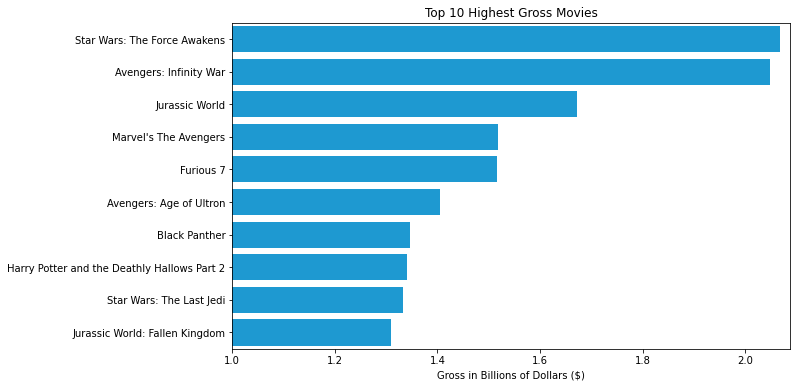

In [12]:
height_top10_gross = sorted(gross_df.sort_values(by='total_gross', ascending=False)[:10]['total_gross'].tolist())
x_top10_gross = gross_df.sort_values(by='total_gross', ascending=False)[:10]['title'].values.tolist()

fig, ax = plt.subplots(figsize=(10,6))
height_top10_gross.reverse()

turn_to_billions(height_top10_gross)

x_lim = sorted(gross_df.sort_values(by='total_gross', ascending=False)[:10]['total_gross'].tolist())[-1] / 1000000000
ax.set_xlim(1, x_lim+.02)
barplot = sns.barplot(x=height_top10_gross, y=x_top10_gross, data=gross_df, color='#00A4EF')
barplot.set(title='Top 10 Highest Gross Movies', xlabel='Gross in Billions of Dollars ($)');
# plt.savefig('output9.png', bbox_inches='tight')

This visualisation shows that all the top grossing movies of the last ten years are from a franchise of movies from a given studio. This gave me the idea of looking up how those type of movies are faring in the box office

### Creating a Franchise database, including Jurassi Park, Harry Potter, Fast and Furious and the top20 grossing Disney movies:

In [13]:
# Fast and Furious franchise
ff1_df = gross_df[gross_df['title'].str.contains('Furious')].copy()
ff2_df = gross_df[gross_df['title'].str.contains('Fast')].copy()
concat_ff = [ff1_df, ff2_df]
ff_df = pd.concat(concat_ff)
ff_drop = ff_df[ff_df['studio'] != 'Uni.']
ff_df.drop(ff_drop.index, axis=0, inplace=True)
ff_df.drop_duplicates(inplace=True)

In [14]:
# Jurassic Park franchise
jp_df = gross_df[gross_df['title'].str.contains('Jurassic')].copy()
jp_drop = jp_df[jp_df['studio'] != 'Uni.']
jp_df.drop(jp_drop.index, axis=0, inplace=True)

In [15]:
# Harry Potter franchise
hp_df = gross_df[gross_df['title'].str.contains('Harry Potter')].copy()

In [16]:
# Disney top20 gross movies
dis_df = gross_df[gross_df['studio'].str.contains('BV')].sort_values(by=['total_gross'], ascending=False)[:20].copy()

In [17]:
# Concatenating them together
to_concat = [ff_df, jp_df, hp_df, dis_df]
franch_df = pd.concat(to_concat)
franch_df.drop(['domestic_gross', 'foreign_gross', 'year', 'studio'], axis=1, inplace=True)
franch_df.set_index('title', inplace=True)
franch_df.reset_index(inplace=True)

### Visualisation of Franchise movies

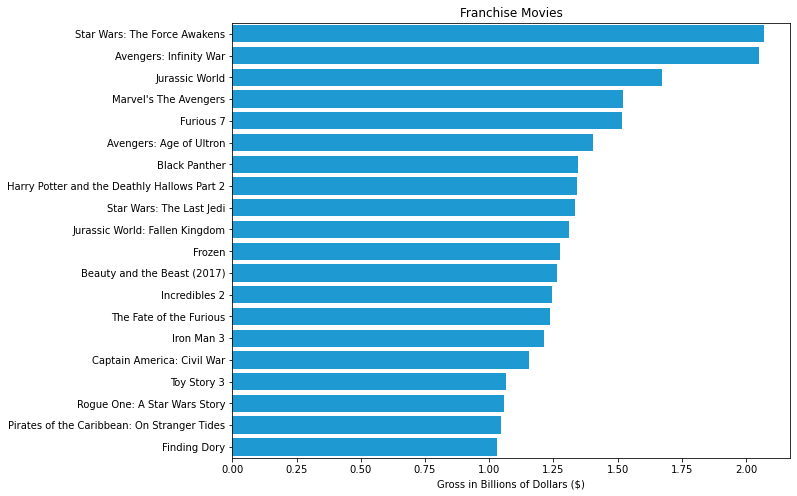

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
y_franch = franch_df.sort_values(by='total_gross', ascending=False)['title'][:20].values.tolist()
x_franch = franch_df.sort_values(by='total_gross', ascending=False)['total_gross'][:20].tolist()

turn_to_billions(x_franch)

barplot = sns.barplot(x=x_franch, y=y_franch, data=franch_df, color='#00A4EF')
barplot.set(title='Franchise Movies', xlabel='Gross in Billions of Dollars ($)');
# plt.savefig('output9.png', bbox_inches='tight')

Unsurprisingly this visualisation has a lot of the same ones of the highest gross movies. It's interesting to note though, that everry movie, from the top20 franchise movie, grossed over 1 billion dollars world wide.

### Creating visualisation for top5 gross movies by their studio

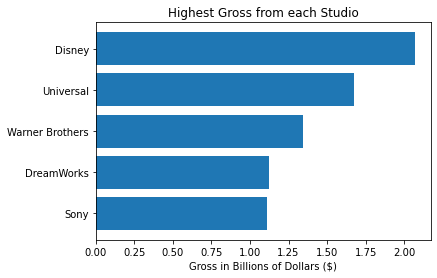

In [19]:
fig, ax = plt.subplots()

x_studio_max = gross_df.groupby(['studio'])['total_gross'].max().sort_values()[-5:].index
height_studio_max = gross_df.groupby(['studio'])['total_gross'].max().sort_values()[-5:].values.astype(list)

studios = ('Sony', 'DreamWorks', 'Warner Brothers', 'Universal', 'Disney')

turn_to_billions(height_studio_max)

ax.barh(x_studio_max, height_studio_max)
ax.set_title('Highest Gross from each Studio')
ax.set_xlabel('Gross in Billions of Dollars ($)')
ax.set_yticks(np.arange(len(studios)))
ax.set_yticklabels(studios);

Apart knowing how the other studios are comparing to each other gross wise, this graph does not  give us information that could lead to a suggestion.

### Creating visualisation for top grossing movie per year

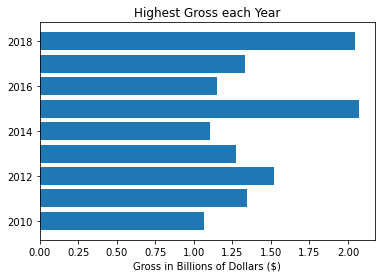

In [20]:
fig, ax = plt.subplots()

height_year_total = gross_df.groupby(['year'])['total_gross'].max().sort_values().values.astype(list)
x_year_total = gross_df.groupby(['year'])['total_gross'].max().sort_values().index

turn_to_billions(height_year_total)

ax.barh(x_year_total, height_year_total)
ax.set_title('Highest Gross each Year')
ax.set_xlabel('Gross in Billions of Dollars ($)');

This again doesn't offer insight for a business recommendation.

### Top200 Most Profitable Movies Runtime

For this visualisation, I took the Profit column created from the The Numbers Movie Budget data set, and combined it with the Imdb Title Basics dataset.

In [21]:
awdf_tbasics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
awdf_tratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
df_budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [22]:
# filter the data to see only results with over 5000 votes
leftjoin_rating_basics = awdf_tratings.set_index('tconst').join(awdf_tbasics.set_index('tconst'), how='left', lsuffix='1', rsuffix='2')
sorted_numvotes = leftjoin_rating_basics.sort_values(by='numvotes', ascending=False)
sorted_averatings = leftjoin_rating_basics.sort_values(by='averagerating', 
                                                       ascending=False).loc[leftjoin_rating_basics['numvotes'] >= 50000]

# get rid of uninmportant information for this visualisation
sorted_averatings.reset_index(inplace=True)
sorted_averatings.drop(['tconst', 'averagerating', 'numvotes', 'start_year', 'original_title', 'genres'], axis=1, inplace=True)
sorted_averatings.rename(columns={'primary_title': 'title'}, inplace=True)
sorted_averatings.set_index('title', inplace=True)

In [23]:
# clean columns of commas and dollar signs. Turns them into Int
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '').str.replace('$', '', regex=False).astype(int)
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '').str.replace('$', '', regex=False).astype(int)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '', regex=False)
def to_int(x):
    x = int(x)
    return x
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(to_int)

# create 'profit' column and get rid of uninmportant information for this visualisation
df_budget['profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']
df_budget.drop(['id', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross'], axis=1, inplace=True)
df_budget.rename(columns={'movie': 'title'}, inplace=True)
df_budget.set_index('title', inplace=True)

In [24]:
# join the profit with runtime dataframes. Drops NaN and duplicates
prof_run_df = df_budget.join(sorted_averatings)
prof_run_df.reset_index(inplace=True)
prof_run_df.dropna(inplace=True)
prof_run_df.drop_duplicates(subset=['title'], inplace=True)

In [25]:
# finds the runtime of the top200 performing movies
top200_runtime_arr = prof_run_df.sort_values(by='profit', ascending=False).sort_values(by='profit', ascending=False)[:200]['runtime_minutes'].values
print(np.percentile(top200_runtime_arr, 75))
print(np.percentile(top200_runtime_arr, 25))

133.0
104.0


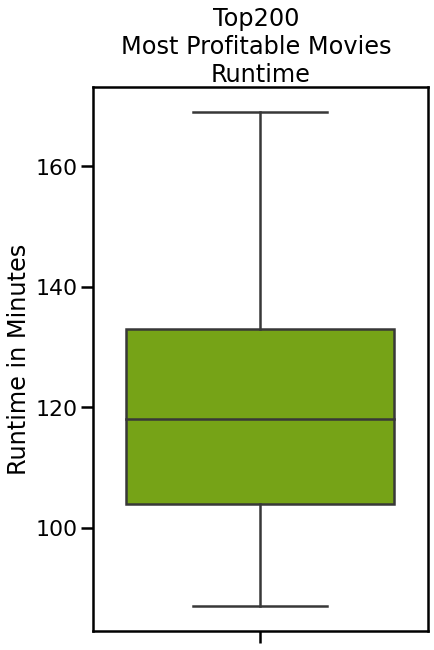

In [30]:
top200_prof_df = prof_run_df.sort_values(by='profit', ascending=False).sort_values(by='profit', ascending=False)[:200]
fig, ax = plt.subplots(figsize=(6, 10))

ax = sns.boxplot(y="runtime_minutes", data=top200_prof_df, linewidth=2.5, color="#7FBA00", showfliers=False)
ax.set_ylabel('Runtime in Minutes')
ax.set_title('Top200 \nMost Profitable Movies \nRuntime')
sns.set_context('poster');

The top 200 most profitable movies have an interquartile range of 29 minutes, between 104 minutes and 133 minutes. We can extrapolate that a movie whitin this range has a higher chance of being more profitable.

## Evaluation
- This data shows that Disney is currently making the highest grossing movies nowadays.<br />
- The top10 high gross movies are all franchise movies. There's the Star Wars franchise, Avengers franchise, Jurassic Park franchise, Fast and Furious franchise and Harry Potter franchise.<br />
- The top15 franchise movies have grossed over 1 billion dollars.<br />
- Since the franchises these movies are a part of are not new (all of them have over 10 years of movies), we cold assume an extrapolation of the data would give similar results.
- The IQR of the top200 most profitable movies runtime shows us our range of recommendation for runtime.
***

## Conclusions
The data for only the last eight years is limited, but if one is looking to make a big box office movie in the next few years, the data from over a decade ago might be less relevant for decision making.
We opted to go with Profit as our most important metric instead of Gross, but the information is very similar.
The IQR of the runtime of the most profitable movies gives a good recommendation for runtime length.
As of now I'd recommend picking a popular franchise that haven't been debuted in the cinemas yet, and make movies based on them.
***